Forex data analysis using machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import google.datalab.bigquery as bq

In [2]:
df = bq.Query(sql='SELECT TIME(FEED_TIME) as FEED_TIME, SOURCE,ASK_PRICE,BID_PRICE FROM caxton.caxton_data ORDER BY FEED_TIME ASC').execute().result().to_dataframe()

In [10]:
df.describe()

,ASK_PRICE,BID_PRICE,Spread
count,457510.000000,457510.000000,457510.000000
mean,32.038419,32.025051,0.013368
std,51.411174,51.393828,0.030568
min,0.684220,0.675450,0.000020
25%,1.161440,1.160900,0.000330
50%,1.327860,1.327280,0.001050
75%,18.807400,18.789830,0.015380
max,132.638000,131.770000,1.860000


In [11]:
#calculating the spread for the entire data
df['Spread']=df['ASK_PRICE']-df['BID_PRICE']
df['Spread']=df['Spread']*100
df['Spread'].head()

0    2.75
1    2.75
2    2.21
3    0.90
4    3.50
Name: Spread, dtype: float64

In [12]:
df_new=df[['FEED_TIME','SOURCE','Spread','ASK_PRICE']]
df_new.set_index(['FEED_TIME'],inplace=True)

SOURCE
BNPFX     Axes(0.125,0.2;0.775x0.7)
BOFAFX    Axes(0.125,0.2;0.775x0.7)
DBFX      Axes(0.125,0.2;0.775x0.7)
GSFX      Axes(0.125,0.2;0.775x0.7)
JPMCFX    Axes(0.125,0.2;0.775x0.7)
MSFX      Axes(0.125,0.2;0.775x0.7)
UBSFX     Axes(0.125,0.2;0.775x0.7)
Name: Spread, dtype: object

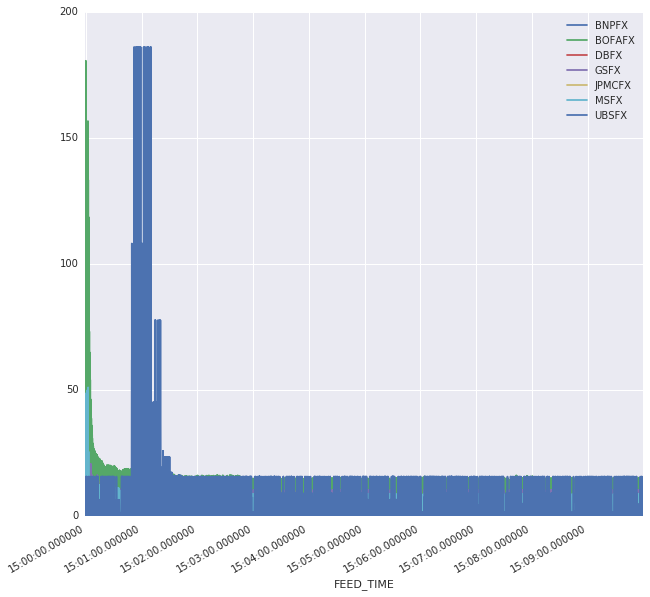

In [16]:
df_new.groupby('SOURCE')['Spread'].plot(legend=True,figsize=(10,10),kind='line')

In [19]:
df['FEED_TIME']=pd.to_datetime(df['FEED_TIME'],unit='ns')
for group,frame in df.groupby(['SOURCE']):
  plt.figure(figsize=(20,20))
  plt.scatter(range(0,len(frame['Spread']),frame['Spread'],label=group))
  plt.legend()

TypeError: range() takes no keyword arguments